
--- Análisis para Chile ---
Gráfico de Sentimiento:


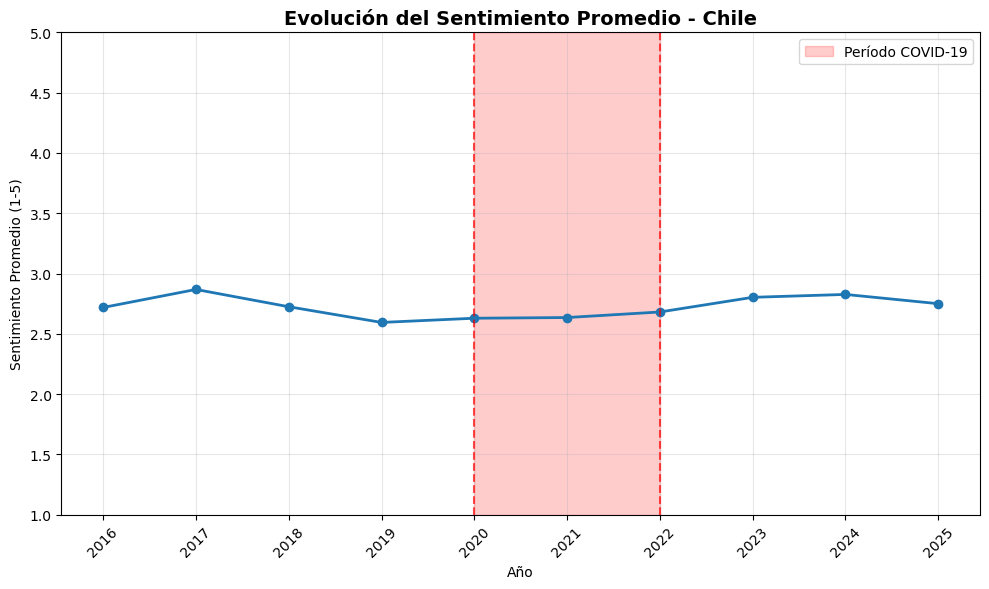

Gráfico de Volumen:


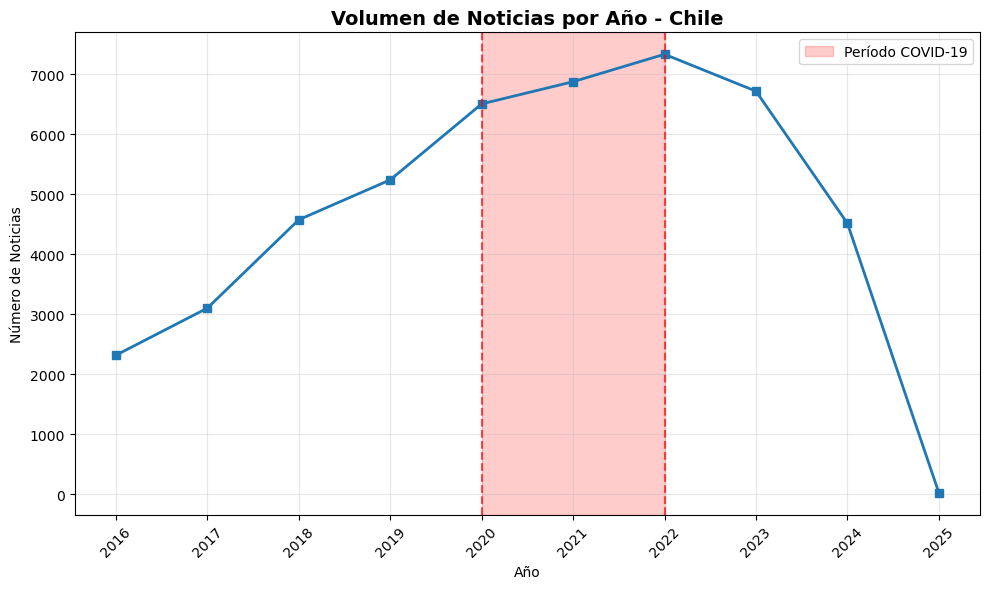

Gráfico de Proporción de Noticias Salud Mental:
Columns after merge: ['year', 'country_x', 'stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5', 'total_news', 'weighted_sentiment', 'country_y', 'news_count']


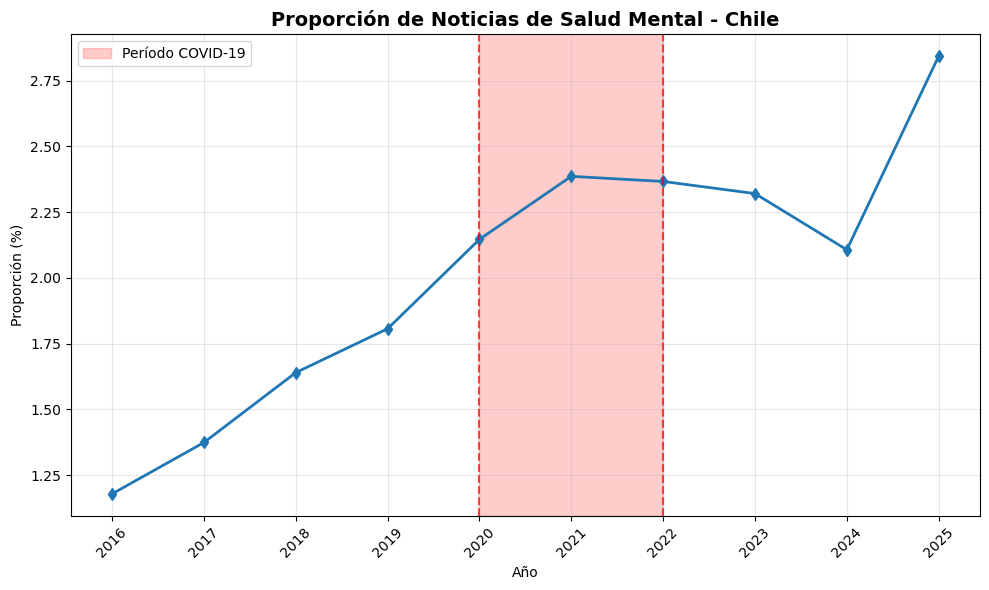

Gráfico de Sentimiento por Tema:


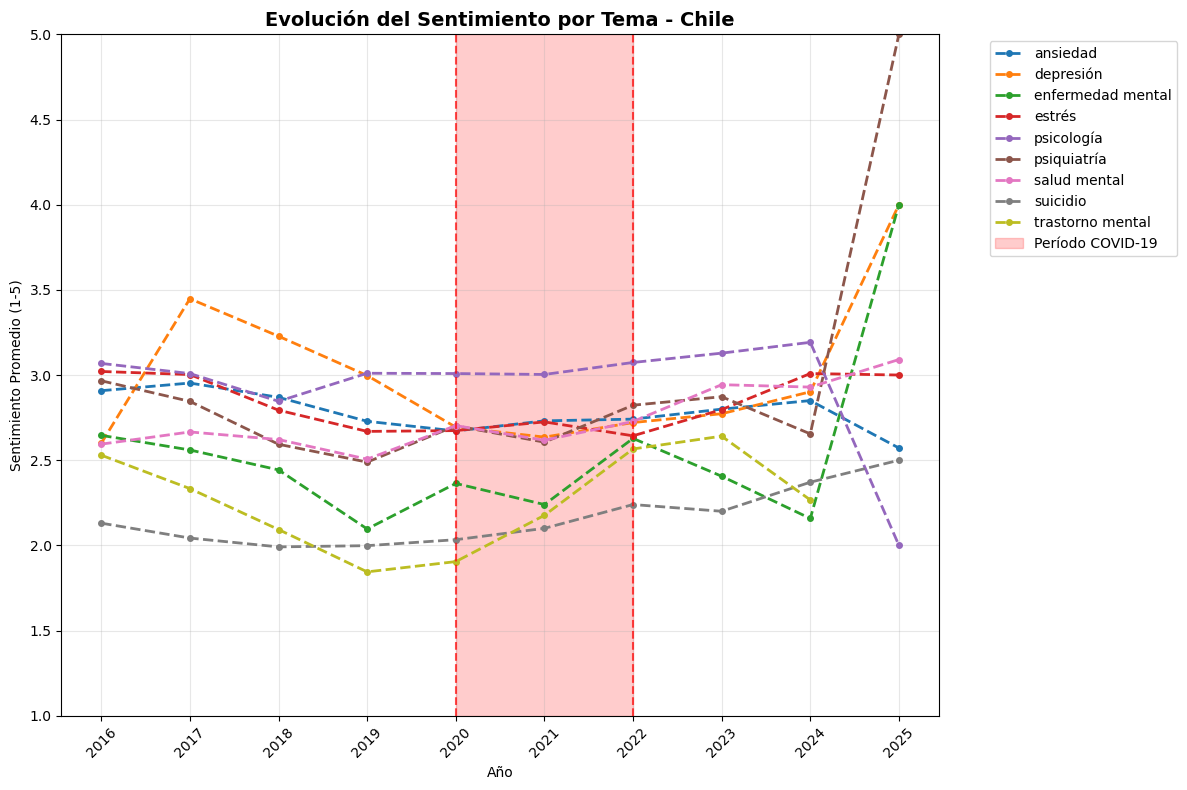

Gráfico de Volumen por Tema:


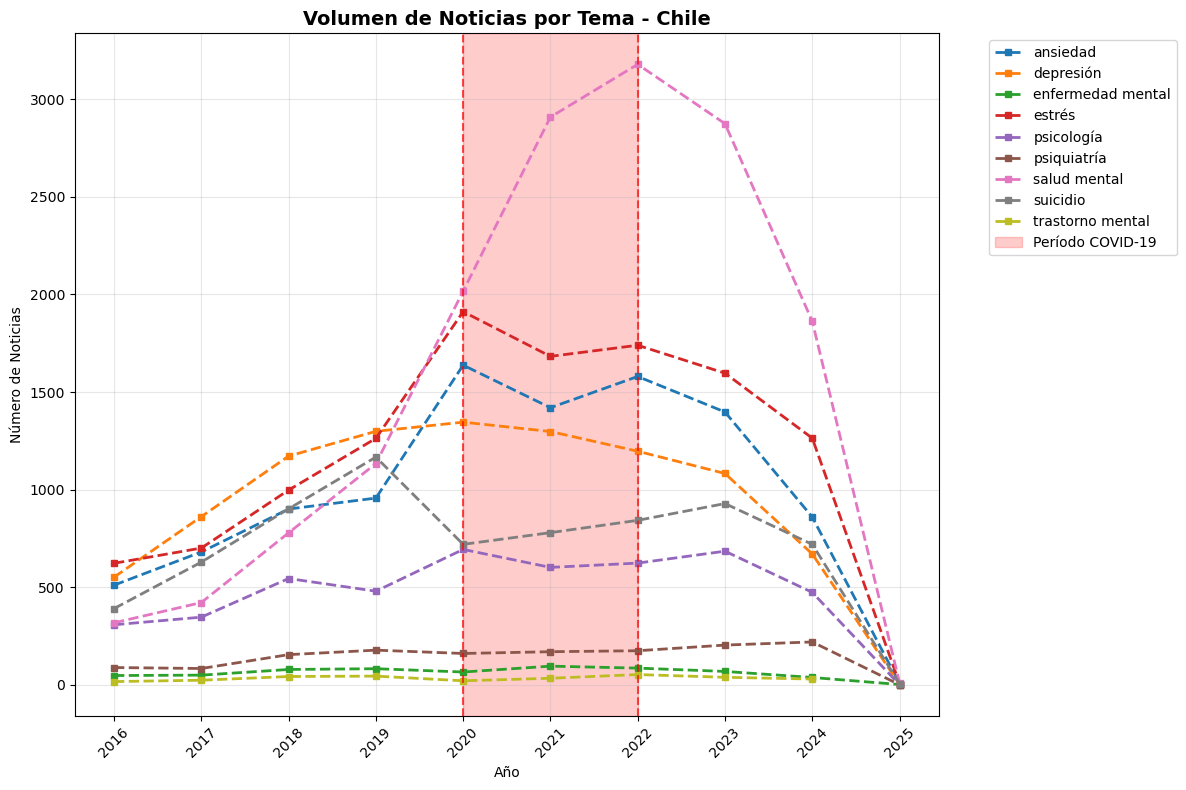


--- Análisis para Espana ---
Gráfico de Sentimiento:


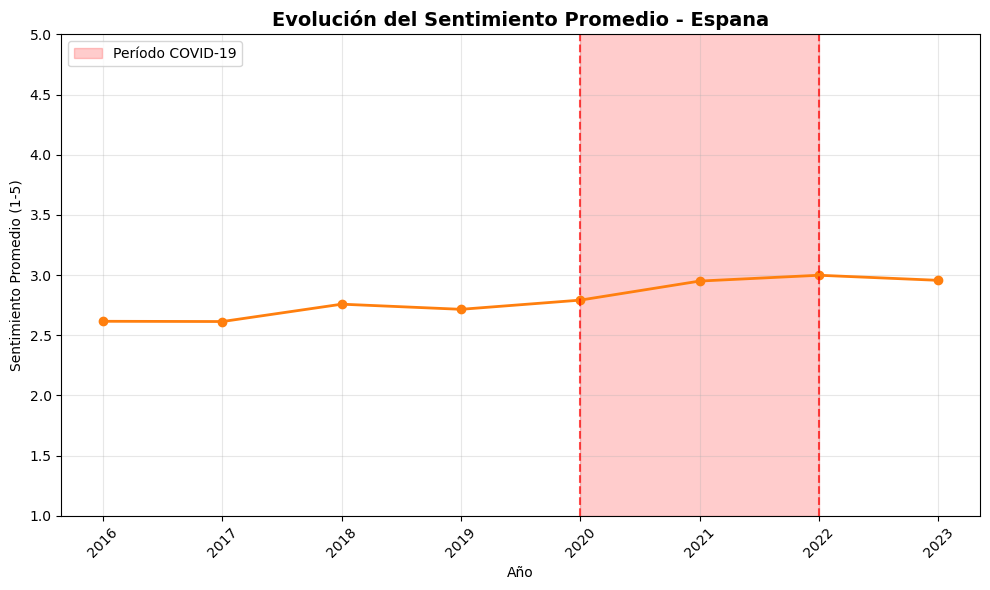

Gráfico de Volumen:


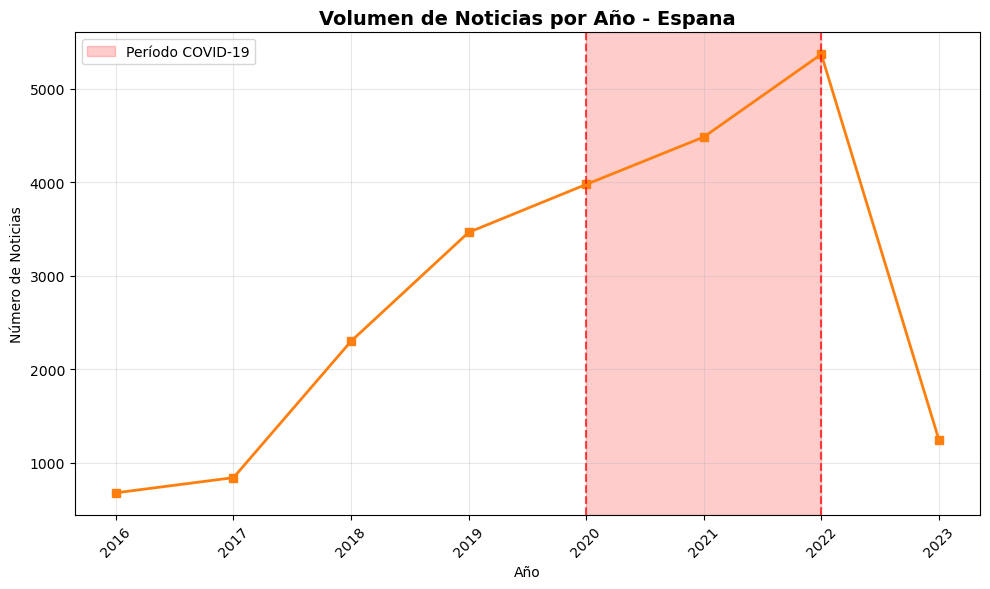

Gráfico de Proporción de Noticias Salud Mental:
Columns after merge: ['year', 'country_x', 'stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5', 'total_news', 'weighted_sentiment', 'country_y', 'news_count']


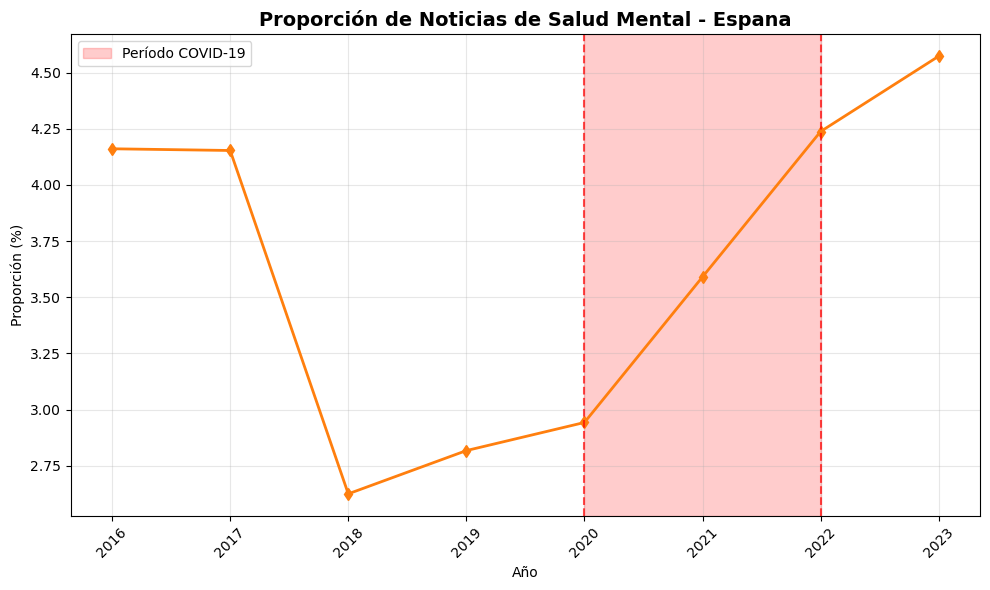

Gráfico de Sentimiento por Tema:


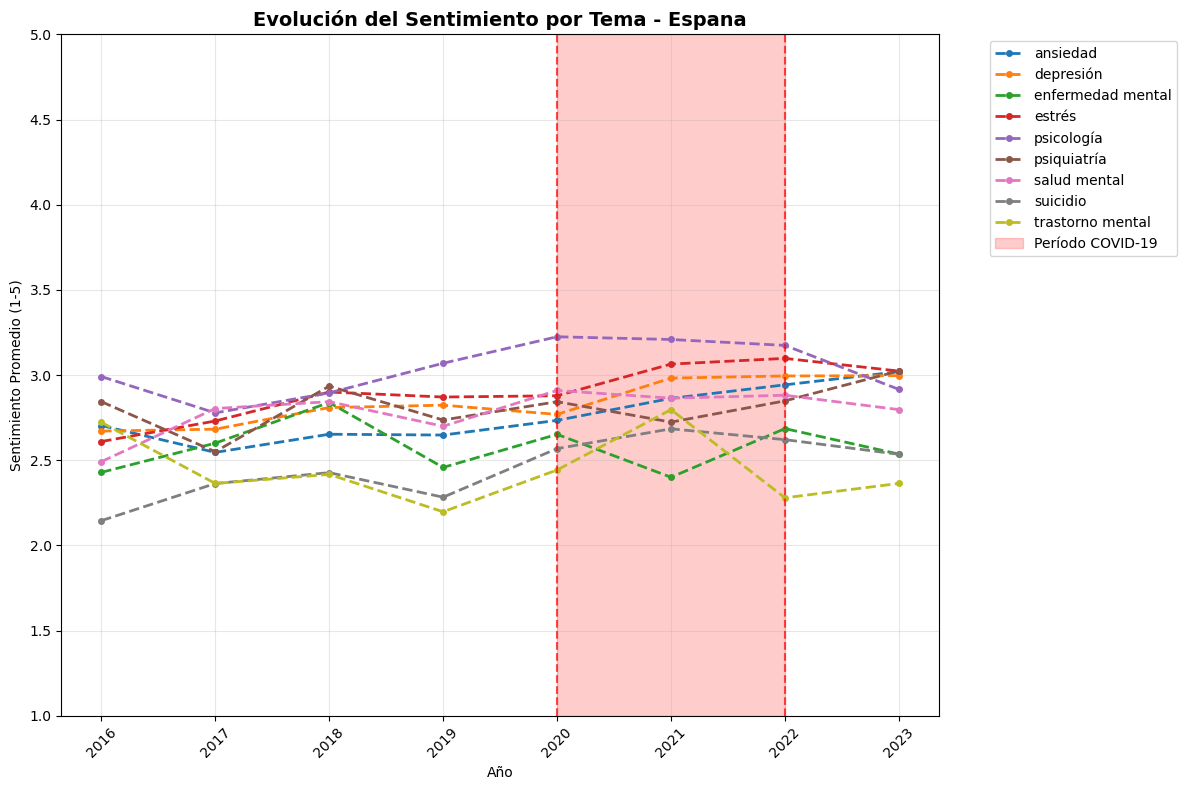

Gráfico de Volumen por Tema:


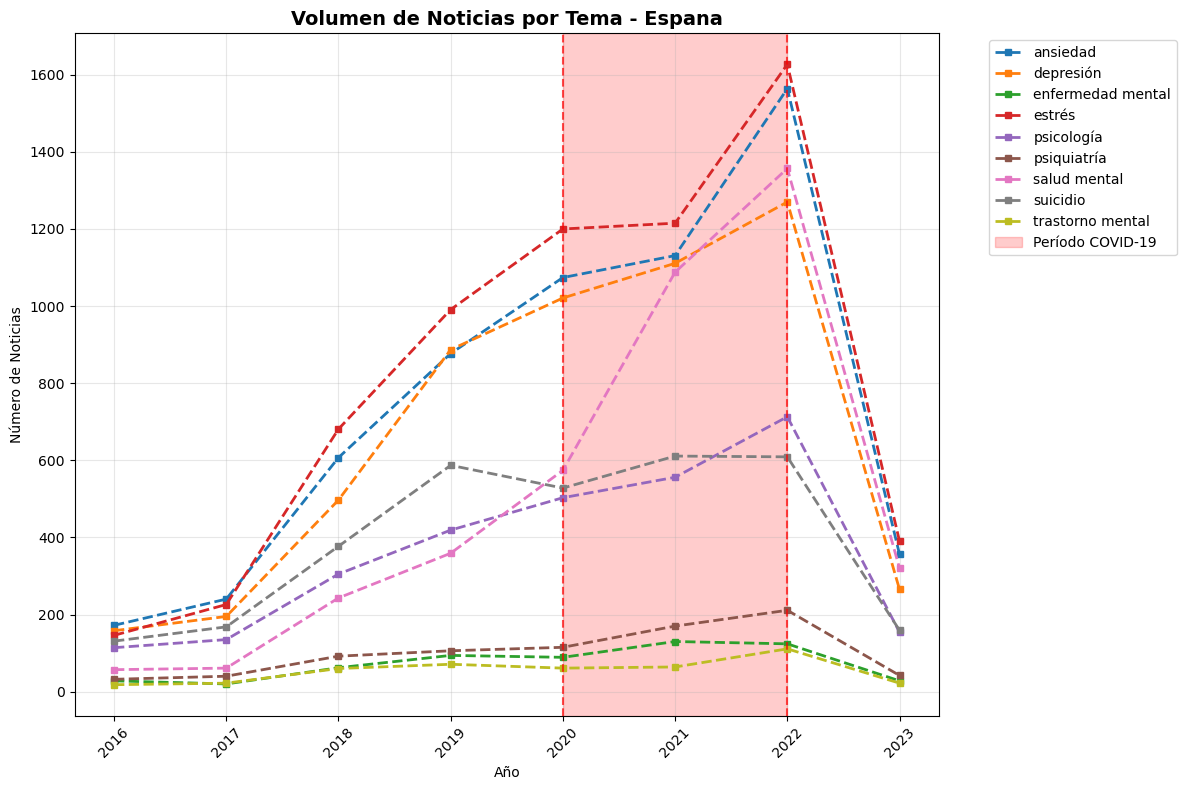


--- Análisis para Mexico ---
Gráfico de Sentimiento:


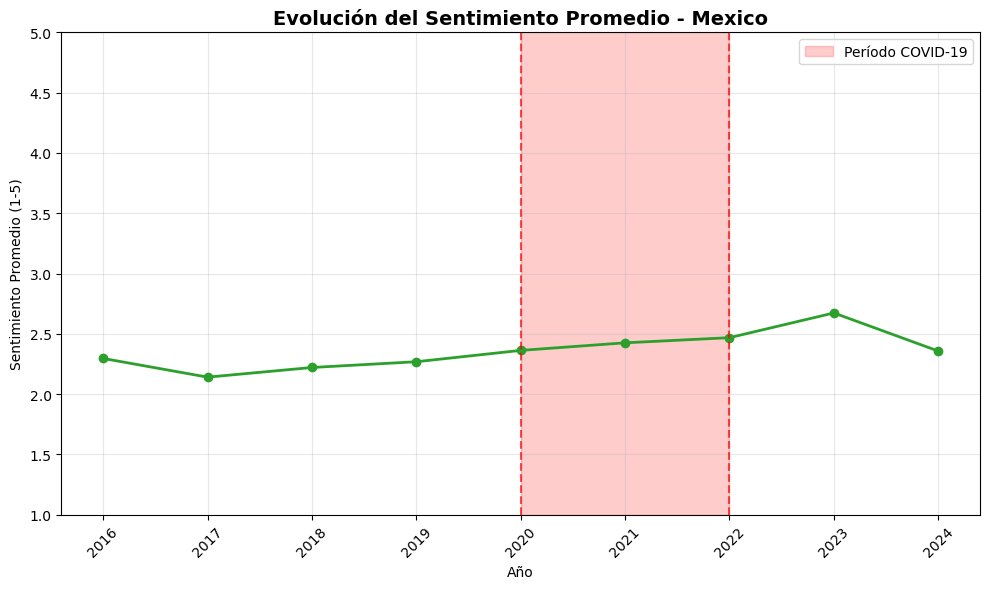

Gráfico de Volumen:


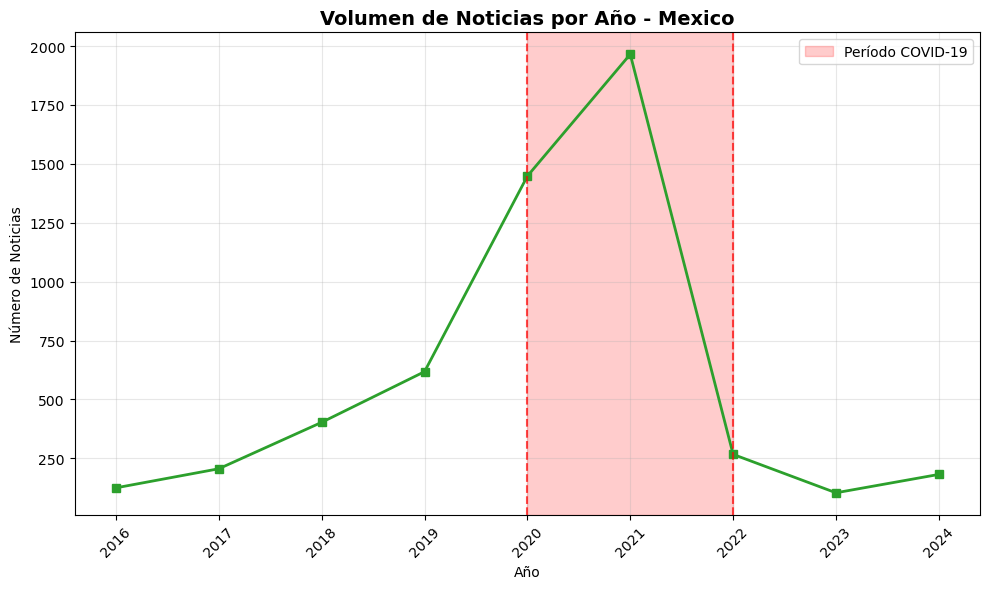

Gráfico de Proporción de Noticias Salud Mental:
Columns after merge: ['year', 'country_x', 'stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5', 'total_news', 'weighted_sentiment', 'country_y', 'news_count']


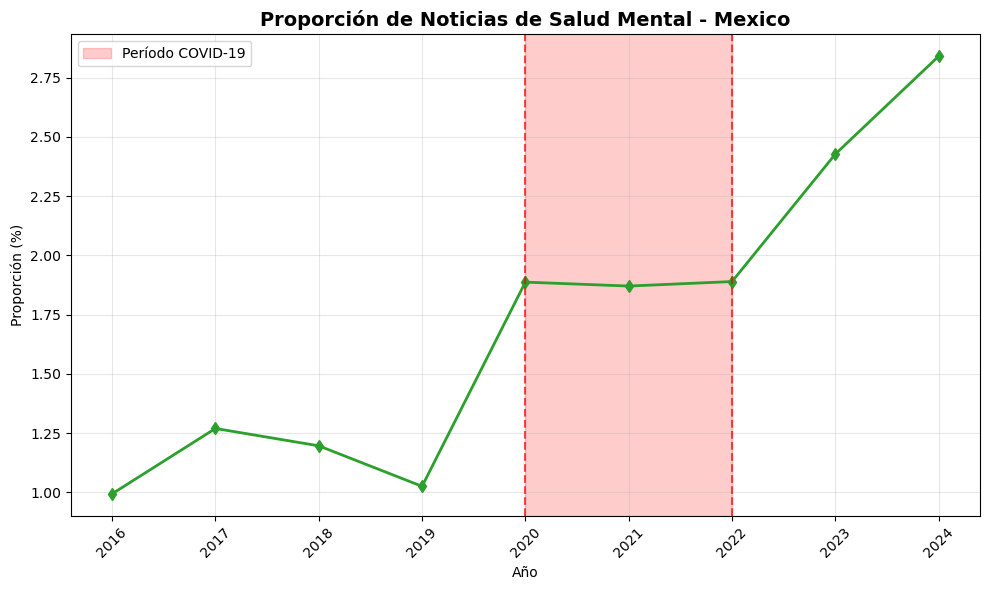

Gráfico de Sentimiento por Tema:


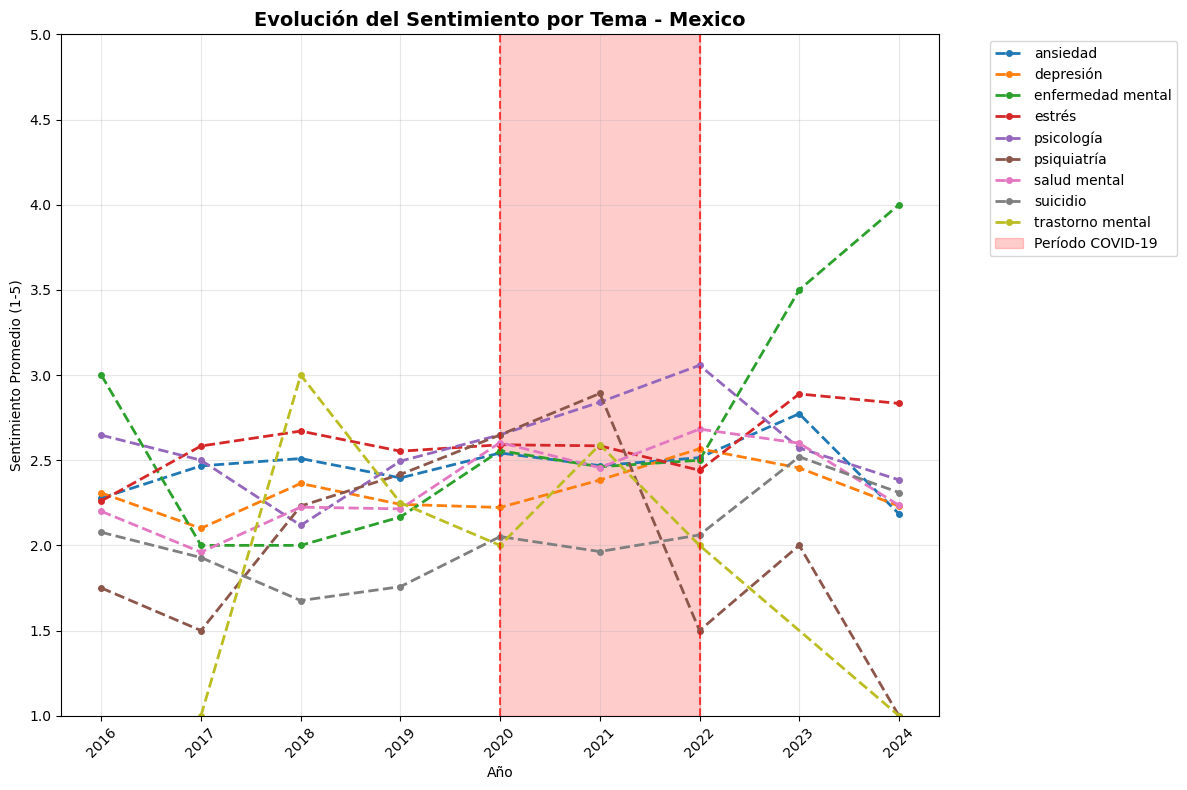

Gráfico de Volumen por Tema:


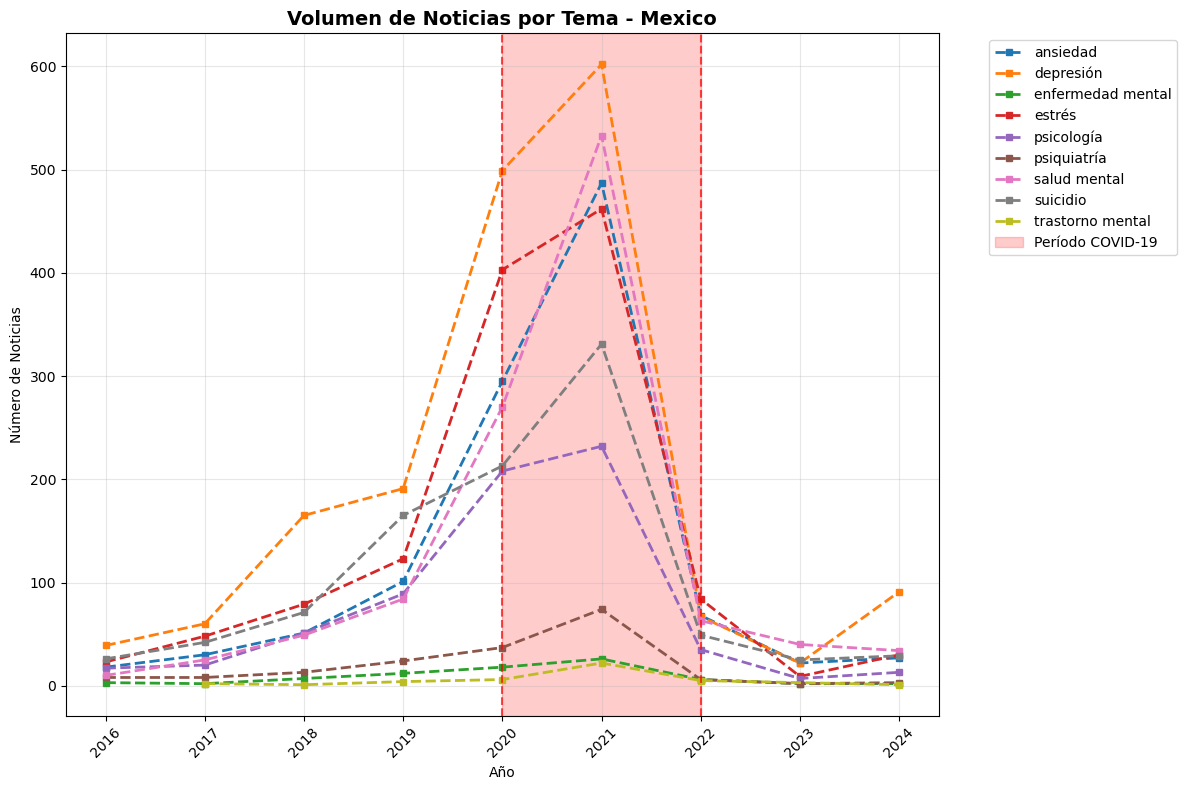


--- Análisis para Peru ---
Gráfico de Sentimiento:


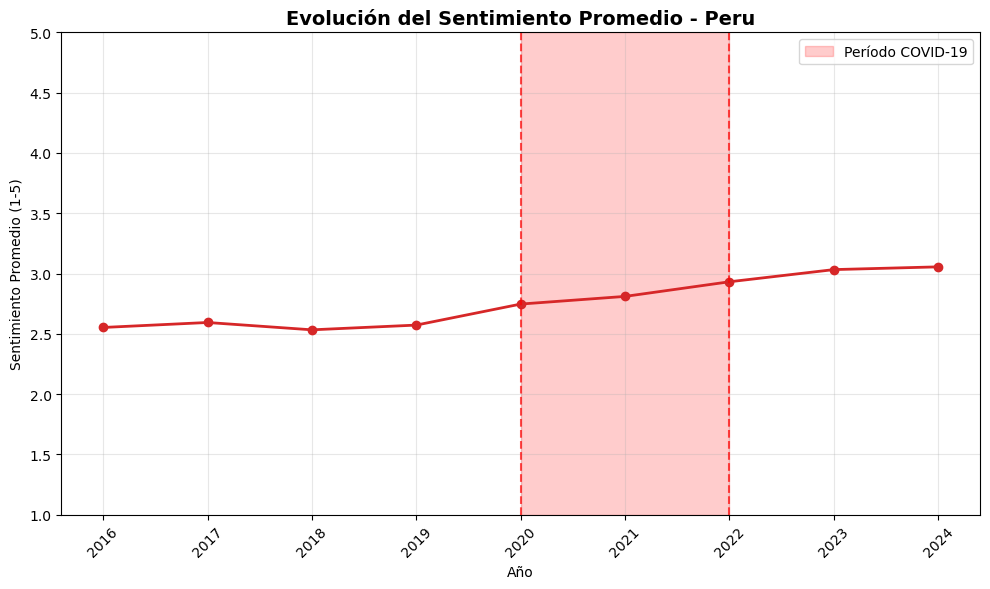

Gráfico de Volumen:


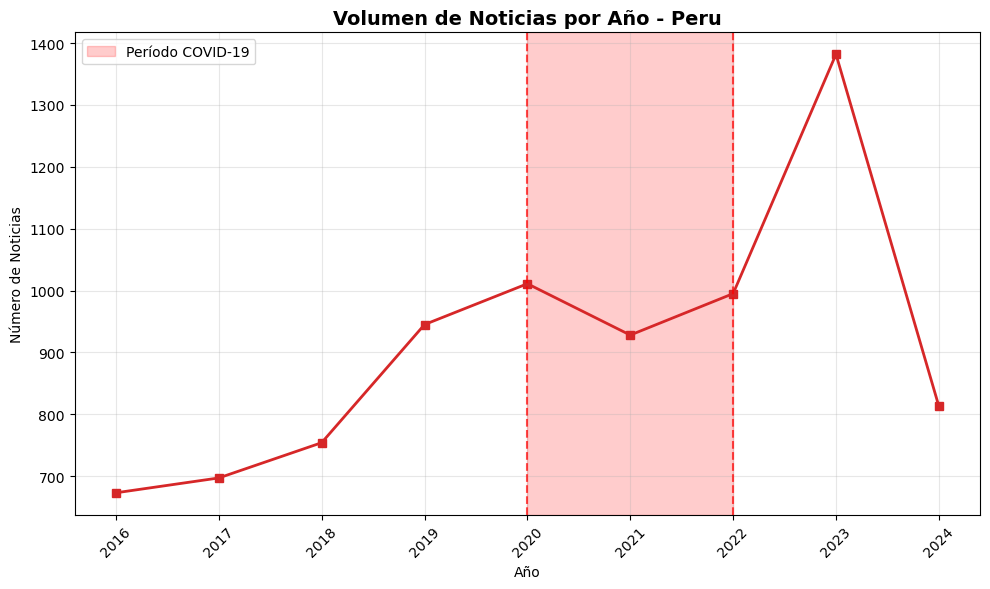

Gráfico de Proporción de Noticias Salud Mental:
Columns after merge: ['year', 'country_x', 'stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5', 'total_news', 'weighted_sentiment', 'country_y', 'news_count']


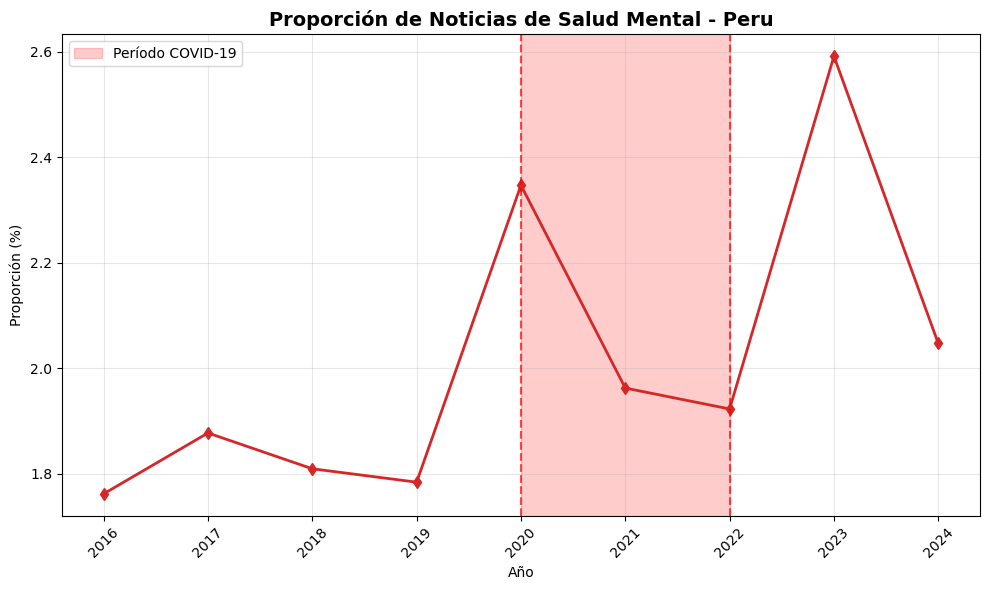

Gráfico de Sentimiento por Tema:


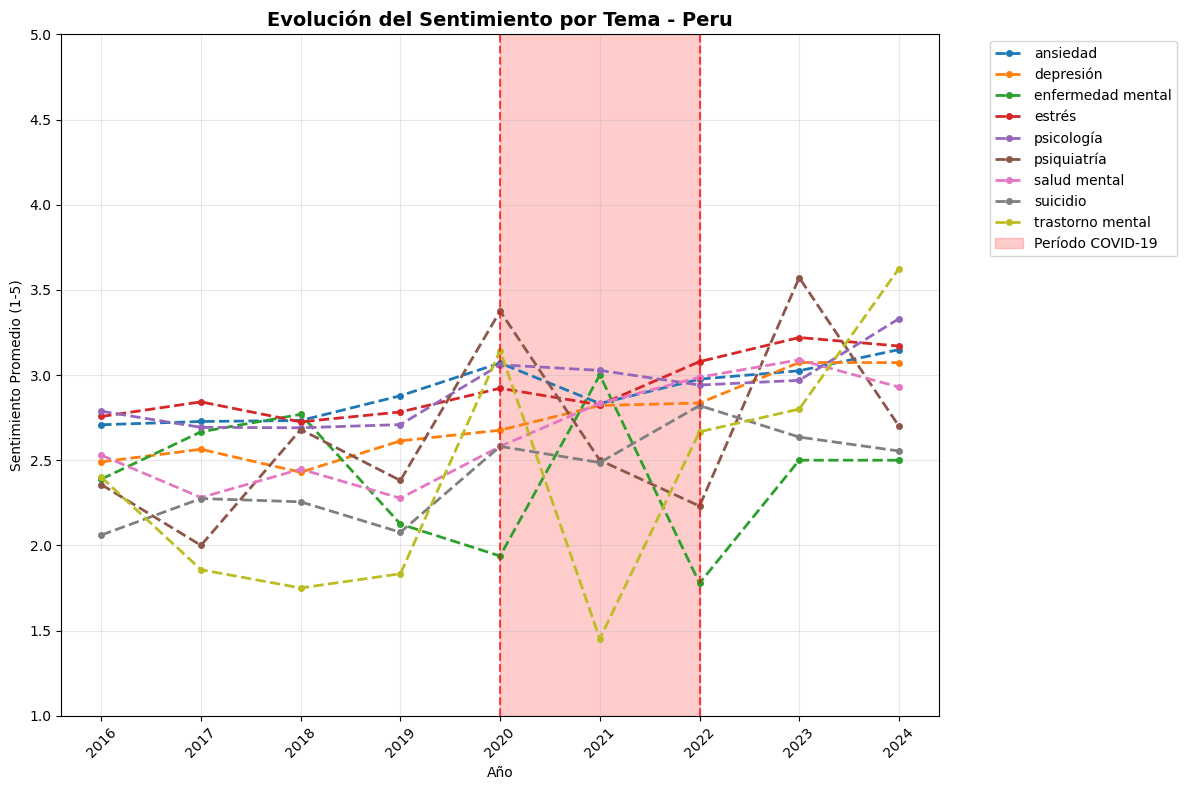

Gráfico de Volumen por Tema:


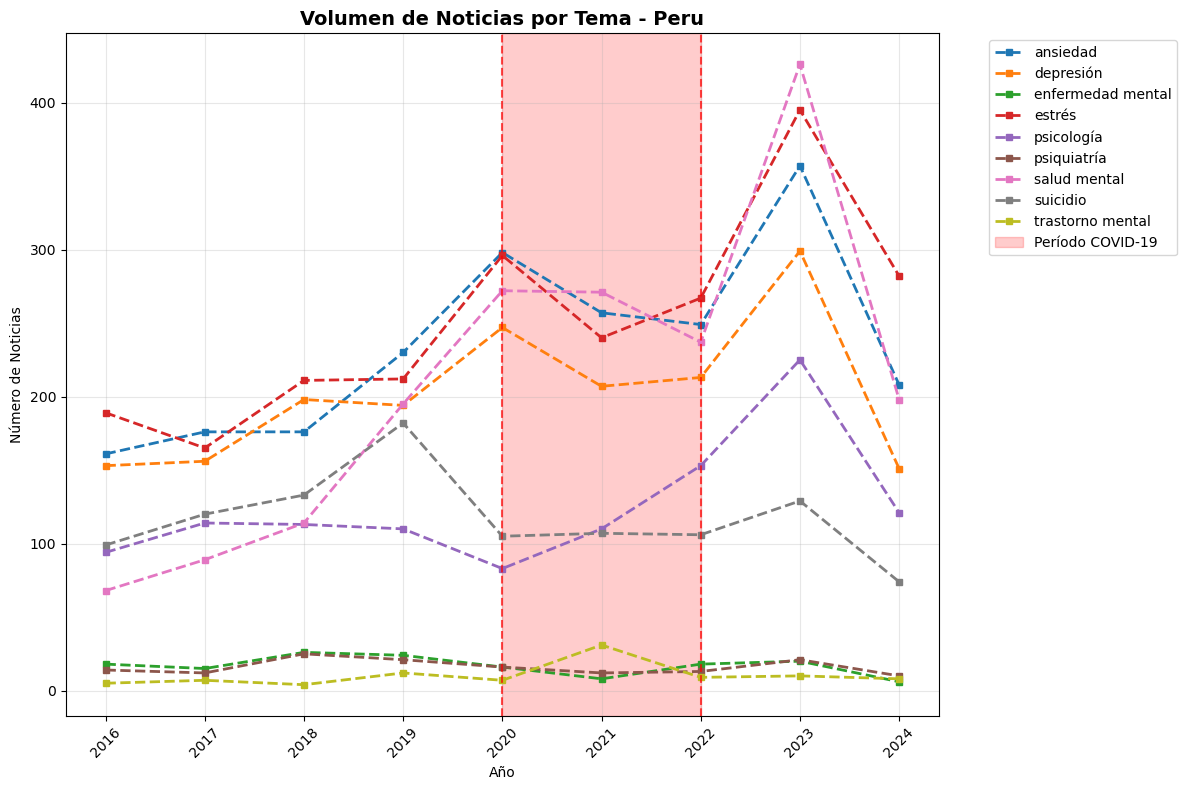


ESTADÍSTICAS POR PERÍODO

CHILE:
----------------------------------------
Antes de 2018:
  • Sentimiento promedio: 2.79
  • Volumen total: 5,424.0
  • Volumen promedio por año: 2712
  • Años analizados: 2

2018-2019:
  • Sentimiento promedio: 2.66
  • Volumen total: 9,816.0
  • Volumen promedio por año: 4908
  • Años analizados: 2

2020-2022 (COVID):
  • Sentimiento promedio: 2.65
  • Volumen total: 20,712.0
  • Volumen promedio por año: 6904
  • Años analizados: 3

Después de 2022:
  • Sentimiento promedio: 2.79
  • Volumen total: 11,261.0
  • Volumen promedio por año: 3754
  • Años analizados: 3


ESPANA:
----------------------------------------
Antes de 2018:
  • Sentimiento promedio: 2.61
  • Volumen total: 1,520.0
  • Volumen promedio por año: 760
  • Años analizados: 2

2018-2019:
  • Sentimiento promedio: 2.74
  • Volumen total: 5,764.0
  • Volumen promedio por año: 2882
  • Años analizados: 2

2020-2022 (COVID):
  • Sentimiento promedio: 2.91
  • Volumen total: 13,830.0
  • Vo

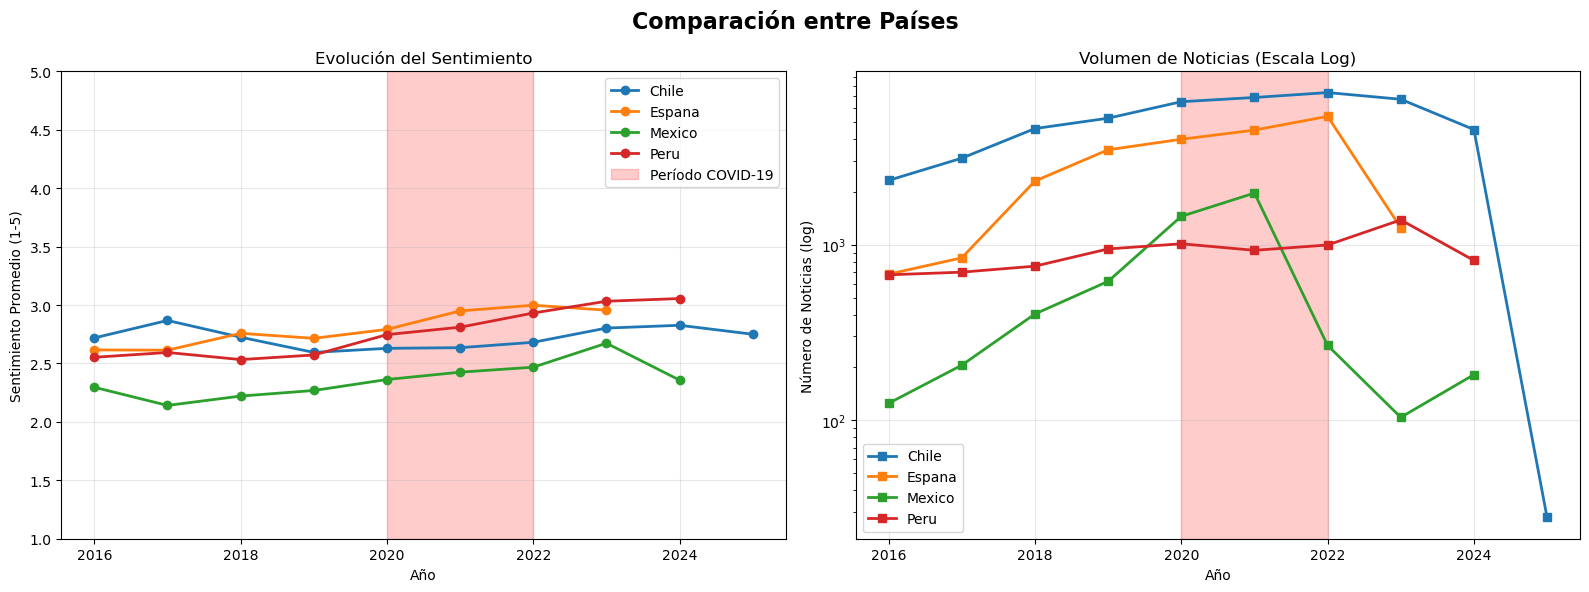


GRÁFICO COMPARATIVO DE PROPORCIÓN ENTRE PAÍSES


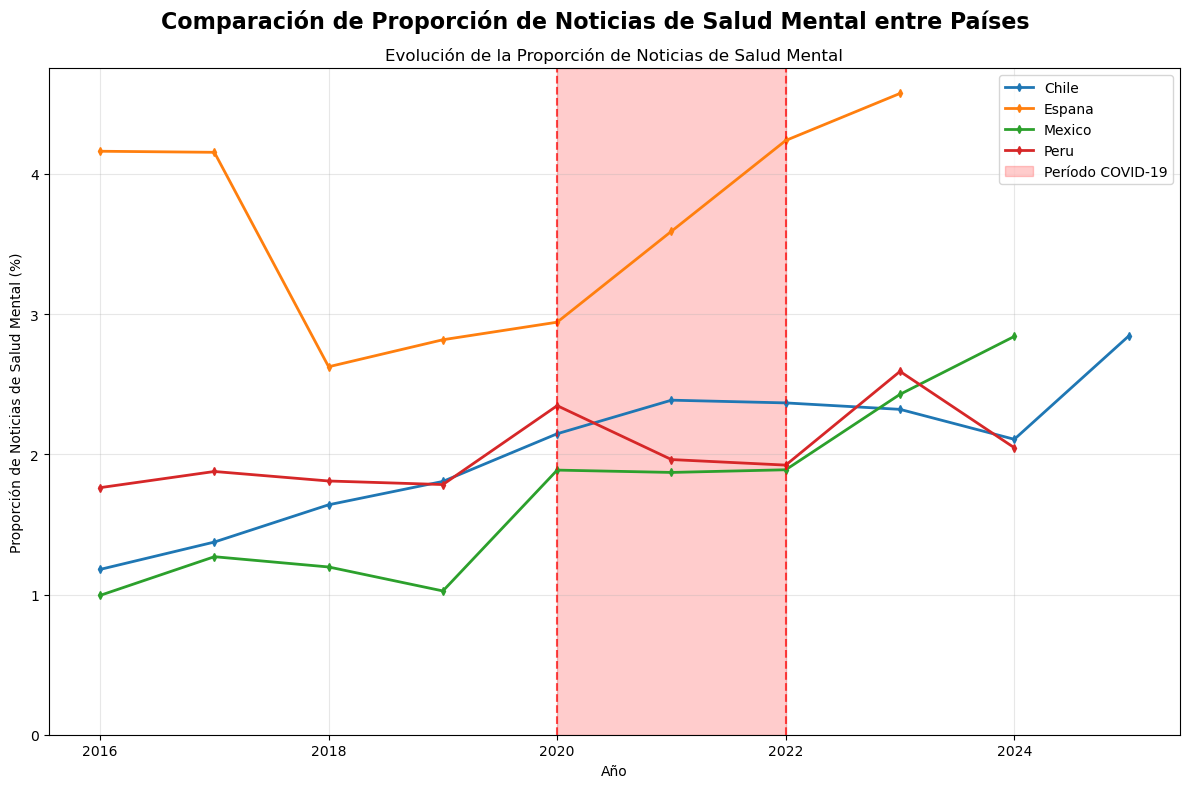

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Leer datos
df = pd.read_csv('star_counts_by_country_year_pivot.csv')
df_topic = pd.read_csv('star_counts_by_country_year_topic_pivot.csv')
df_total_news = pd.read_csv('news_counts_by_country.csv')

# Calculo país/año
df['total_news'] = df[['stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5']].sum(axis=1)
df['weighted_sentiment'] = (df['stars_1']*1 + df['stars_2']*2 + df['stars_3']*3 + 
                           df['stars_4']*4 + df['stars_5']*5) / df['total_news']

# Calculo país/año/tema
df_topic['total_news'] = df_topic[['stars_1', 'stars_2', 'stars_3', 'stars_4', 'stars_5']].sum(axis=1)
df_topic['weighted_sentiment'] = (df_topic['stars_1']*1 + df_topic['stars_2']*2 + df_topic['stars_3']*3 + 
                                 df_topic['stars_4']*4 + df_topic['stars_5']*5) / df_topic['total_news']

# Definir periodo COVID
covid_start = 2020
covid_end = 2022

# Diseño Gráfico
plt.style.use('default')
colors = {'chile': '#1f77b4', 'espana': '#ff7f0e', 'mexico': '#2ca02c', 'peru': '#d62728'}

topic_colors = {
    'ansiedad': '#1f77b4',
    'depresión': '#ff7f0e', 
    'enfermedad mental': '#2ca02c',
    'estrés': '#d62728',
    'psicología': '#9467bd',
    'psiquiatría': '#8c564b',
    'salud mental': '#e377c2',
    'suicidio': '#7f7f7f',
    'trastorno mental': '#bcbd22'
}

def create_sentiment_plot(country_data, country_name):    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(country_data['year'], country_data['weighted_sentiment'], 
             marker='o', linewidth=2, markersize=6, color=colors.get(country_name, 'blue'))
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    ax.set_title(f'Evolución del Sentimiento Promedio - {country_name.title()}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Sentimiento Promedio (1-5)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_ylim(1, 5)
    
    ax.set_xticks(country_data['year'])
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def create_volume_plot(country_data, country_name):    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(country_data['year'], country_data['total_news'], 
             marker='s', linewidth=2, markersize=6, color=colors.get(country_name, 'blue'))
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    ax.set_title(f'Volumen de Noticias por Año - {country_name.title()}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Noticias')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    ax.set_xticks(country_data['year'])
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def create_ratio_plot(country_data, country_name, total_news_data):
    merged_data = country_data.merge(total_news_data, on=['year'], how='inner')
    print("Columns after merge:", merged_data.columns.tolist()) 
    
    # Calcular proporción
    if 'total_news_x' in merged_data.columns and 'news_count' in merged_data.columns:
        merged_data['ratio'] = merged_data['total_news_x'] / merged_data['news_count'] * 100
    elif 'total_news' in merged_data.columns and 'news_count' in merged_data.columns:
        merged_data['ratio'] = merged_data['total_news'] / merged_data['news_count'] * 100
    else:
        mental_health_col = [col for col in merged_data.columns if 'total_news' in col][0]
        total_news_col = 'news_count' 
        merged_data['ratio'] = merged_data[mental_health_col] / merged_data[total_news_col] * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(merged_data['year'], merged_data['ratio'], 
             marker='d', linewidth=2, markersize=6, color=colors.get(country_name, 'blue'))
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    ax.set_title(f'Proporción de Noticias de Salud Mental - {country_name.title()}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Proporción (%)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    ax.set_xticks(merged_data['year'])
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig
    
def create_topic_sentiment_plot(country_data, country_name):    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    topics = country_data['topic'].unique()
    
    for topic in topics:
        topic_data = country_data[country_data['topic'] == topic].sort_values('year')
        if len(topic_data) > 0:
            ax.plot(topic_data['year'], topic_data['weighted_sentiment'], 
                   marker='o', linewidth=2, markersize=4, linestyle='--',
                   color=topic_colors.get(topic, 'gray'), label=topic)
    
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    ax.set_title(f'Evolución del Sentimiento por Tema - {country_name.title()}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Sentimiento Promedio (1-5)')
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(1, 5)
    
    years = sorted(country_data['year'].unique())
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def create_topic_volume_plot(country_data, country_name):    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    topics = country_data['topic'].unique()
    
    for topic in topics:
        topic_data = country_data[country_data['topic'] == topic].sort_values('year')
        if len(topic_data) > 0:
            ax.plot(topic_data['year'], topic_data['total_news'], 
                   marker='s', linewidth=2, markersize=4, linestyle='--',
                   color=topic_colors.get(topic, 'gray'), label=topic)
    
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    ax.set_title(f'Volumen de Noticias por Tema - {country_name.title()}', 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Noticias')
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    years = sorted(country_data['year'].unique())
    ax.set_xticks(years)
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Generar Gráfica por país
countries = df['country'].unique()

for country in countries:
    country_data = df[df['country'] == country].copy()
    country_data = country_data.sort_values('year')
    
    country_total_news = df_total_news[df_total_news['country'] == country].copy()
    
    country_topic_data = df_topic[df_topic['country'] == country].copy()
    
    if len(country_data) > 0:
        print(f"\n--- Análisis para {country.title()} ---")
        print("Gráfico de Sentimiento:")
        create_sentiment_plot(country_data, country)
        
        print("Gráfico de Volumen:")
        create_volume_plot(country_data, country)
        
        print("Gráfico de Proporción de Noticias Salud Mental:")
        create_ratio_plot(country_data, country, country_total_news)
        
        if len(country_topic_data) > 0:
            print("Gráfico de Sentimiento por Tema:")
            create_topic_sentiment_plot(country_topic_data, country)
            
            print("Gráfico de Volumen por Tema:")
            create_topic_volume_plot(country_topic_data, country)

def calculate_period_stats():
    results = {}
    
    for country in countries:
        country_data = df[df['country'] == country].copy()
        
        # Periodos
        long_before = country_data[country_data['year'] < 2018]
        shortly_before = country_data[(country_data['year'] >= 2018) & (country_data['year'] < 2020)]
        during_covid = country_data[(country_data['year'] >= 2020) & (country_data['year'] <= 2022)]
        after_covid = country_data[country_data['year'] > 2022]
        
        country_results = {}
        
        for period_name, period_data in [
            ('Antes de 2018', long_before),
            ('2018-2019', shortly_before),
            ('2020-2022 (COVID)', during_covid),
            ('Después de 2022', after_covid)
        ]:
            if len(period_data) > 0:
                avg_sentiment = period_data['weighted_sentiment'].mean()
                total_volume = period_data['total_news'].sum()
                avg_volume = period_data['total_news'].mean()
                
                country_results[period_name] = {
                    'avg_sentiment': avg_sentiment,
                    'total_volume': total_volume,
                    'avg_volume_per_year': avg_volume,
                    'years_count': len(period_data)
                }
            else:
                country_results[period_name] = {
                    'avg_sentiment': None,
                    'total_volume': 0,
                    'avg_volume_per_year': 0,
                    'years_count': 0
                }
        
        results[country] = country_results
    
    return results

period_stats = calculate_period_stats()

print("\n" + "="*80)
print("ESTADÍSTICAS POR PERÍODO")
print("="*80)

for country, stats in period_stats.items():
    print(f"\n{country.upper()}:")
    print("-" * 40)
    
    for period, data in stats.items():
        if data['avg_sentiment'] is not None:
            print(f"{period}:")
            print(f"  • Sentimiento promedio: {data['avg_sentiment']:.2f}")
            print(f"  • Volumen total: {data['total_volume']:,}")
            print(f"  • Volumen promedio por año: {data['avg_volume_per_year']:.0f}")
            print(f"  • Años analizados: {data['years_count']}")
        else:
            print(f"{period}: Sin datos")
        print()

def create_summary_comparison():    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Comparación entre Países', fontsize=16, fontweight='bold')
    
    # Plot 1: Sentimiento/año
    for country in countries:
        country_data = df[df['country'] == country].copy()
        country_data = country_data.sort_values('year')
        
        if len(country_data) > 5:  
            ax1.plot(country_data['year'], country_data['weighted_sentiment'], 
                    marker='o', linewidth=2, label=country.title(), 
                    color=colors.get(country, 'gray'))
    
    ax1.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax1.set_title('Evolución del Sentimiento')
    ax1.set_xlabel('Año')
    ax1.set_ylabel('Sentimiento Promedio (1-5)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_ylim(1, 5)
    
    # Plot 2: Volumen/año
    for country in countries:
        country_data = df[df['country'] == country].copy()
        country_data = country_data.sort_values('year')
        
        if len(country_data) > 5:  
            ax2.semilogy(country_data['year'], country_data['total_news'], 
                        marker='s', linewidth=2, label=country.title(),
                        color=colors.get(country, 'gray'))
    
    ax2.axvspan(covid_start, covid_end, alpha=0.2, color='red')
    ax2.set_title('Volumen de Noticias (Escala Log)')
    ax2.set_xlabel('Año')
    ax2.set_ylabel('Número de Noticias (log)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def create_ratio_comparison():    
    fig, ax = plt.subplots(figsize=(12, 8))
    fig.suptitle('Comparación de Proporción de Noticias de Salud Mental entre Países', fontsize=16, fontweight='bold')
    
    for country in countries:
        country_data = df[df['country'] == country].copy()
        country_total_news = df_total_news[df_total_news['country'] == country].copy()
        
        if len(country_data) > 0 and len(country_total_news) > 0:
            merged_data = country_data.merge(country_total_news, on=['year'], how='inner')
            
            if len(merged_data) > 0:
                if 'total_news_x' in merged_data.columns and 'news_count' in merged_data.columns:
                    merged_data['ratio'] = merged_data['total_news_x'] / merged_data['news_count'] * 100
                elif 'total_news' in merged_data.columns and 'news_count' in merged_data.columns:
                    merged_data['ratio'] = merged_data['total_news'] / merged_data['news_count'] * 100
                else:
                    mental_health_col = [col for col in merged_data.columns if 'total_news' in col][0]
                    total_news_col = 'news_count'
                    merged_data['ratio'] = merged_data[mental_health_col] / merged_data[total_news_col] * 100
                
                merged_data = merged_data.sort_values('year')
                
                if len(merged_data) > 2:
                    ax.plot(merged_data['year'], merged_data['ratio'], 
                           marker='d', linewidth=2, markersize=4, label=country.title(),
                           color=colors.get(country, 'gray'))
    
    ax.axvspan(covid_start, covid_end, alpha=0.2, color='red', label='Período COVID-19')
    ax.axvline(covid_start, color='red', linestyle='--', alpha=0.7)
    ax.axvline(covid_end, color='red', linestyle='--', alpha=0.7)
    
    ax.set_title('Evolución de la Proporción de Noticias de Salud Mental')
    ax.set_xlabel('Año')
    ax.set_ylabel('Proporción de Noticias de Salud Mental (%)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    ax.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("GRÁFICO COMPARATIVO ENTRE PAÍSES")
print("="*80)
create_summary_comparison()

print("\n" + "="*80)
print("GRÁFICO COMPARATIVO DE PROPORCIÓN ENTRE PAÍSES")
print("="*80)
create_ratio_comparison()